# Setup
Include Libraries

In [1]:
import spotipy.util as util
import spotipy
import pandas as pd
import numpy as np


# Get Streamings from client
Get the streaming data from spotify data files downloaded

In [2]:
import ast
from typing import List
from os import listdir
def get_streamings(path: str = 'Spotify Data') -> List[dict]:
    
    files = ['Spotify Data/' + x for x in listdir(path)
             if x.split('.')[0][:-1] == 'StreamingHistory']
    
    all_streamings = []
    
    for file in files: 
        with open(file, 'r', encoding='UTF-8') as f:
            new_streamings = ast.literal_eval(f.read())
            all_streamings += [streaming for streaming 
                               in new_streamings]
    return all_streamings

# Access Spotify for Authorisation of Data
username = username of client who provides data
client id, client secret = my own spotify dashboard app
redirecct_uri = callback uri to authenticate
!! Remember not to delete cache fiel formed by this. It is the token to access data

In [27]:
username = '9cjfei8bx9vq78vel4odrjd3y'
client_id ='f2018fb393c2424dba2844c31e8e2c18'
client_secret = 'f4bb9567dafc4625877be647542fd919'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played user-top-read playlist-read-private user-library-read user-follow-read'

token = util.prompt_for_user_token(username=username, 
scope=scope, 
client_id=client_id,   
client_secret=client_secret,     
redirect_uri=redirect_uri)


# More Functions
get_id : Get Id for songs
get_features: Get features for Songs
- Instrumentalness: 
This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
- Acousticness: 
This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- Liveness: 
This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
- Speechiness: 
“Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
- Energy: 
“(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
- Danceability: 
“Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
- Valence: 
“A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

In [6]:
import requests
def get_id(track_name: str, token: str) -> str:
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
    params = [
    ('q', track_name),
    ('type', 'track'),
    ]
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
    except:
        return None

In [7]:
lucy_id = get_id('Lucy', token)
print(lucy_id)


5RxpYHVbGJPOvSEATQyg9P


In [8]:
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        features = sp.audio_features([track_id])
        return features[0]
    except:
        return None


In [9]:
lucy_features = get_features(lucy_id, token)
print(lucy_features)

{'danceability': 0.647, 'energy': 0.537, 'key': 6, 'loudness': -12.006, 'mode': 0, 'speechiness': 0.21, 'acousticness': 0.43, 'instrumentalness': 0.000258, 'liveness': 0.119, 'valence': 0.846, 'tempo': 84.46, 'type': 'audio_features', 'id': '5RxpYHVbGJPOvSEATQyg9P', 'uri': 'spotify:track:5RxpYHVbGJPOvSEATQyg9P', 'track_href': 'https://api.spotify.com/v1/tracks/5RxpYHVbGJPOvSEATQyg9P', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5RxpYHVbGJPOvSEATQyg9P', 'duration_ms': 142500, 'time_signature': 4}


# Start Acquiring Data
Get streamings from the user files and start getting features and data modelling

In [18]:
streamings = get_streamings()
res = [i for i in streamings if i['msPlayed'] >60000]
res

[{'endTime': '2019-07-02 04:37',
  'artistName': 'Maroon 5',
  'trackName': 'Girls Like You',
  'msPlayed': 215229},
 {'endTime': '2019-07-02 04:53',
  'artistName': 'Maroon 5',
  'trackName': 'Wait',
  'msPlayed': 190642},
 {'endTime': '2019-07-02 04:58',
  'artistName': 'Fall Out Boy',
  'trackName': 'The Last Of The Real Ones',
  'msPlayed': 230400},
 {'endTime': '2019-07-02 05:02',
  'artistName': 'Fort Minor',
  'trackName': 'Remember the Name (feat. Styles of Beyond)',
  'msPlayed': 230493},
 {'endTime': '2019-07-02 05:06',
  'artistName': 'Fall Out Boy',
  'trackName': 'Fourth Of July',
  'msPlayed': 224360},
 {'endTime': '2019-07-02 05:09',
  'artistName': 'Black Veil Brides',
  'trackName': 'In The End',
  'msPlayed': 228280},
 {'endTime': '2019-07-02 05:12',
  'artistName': 'Don Lore V',
  'trackName': 'Danza Kuduro - Original Mix',
  'msPlayed': 140427},
 {'endTime': '2019-07-02 05:15',
  'artistName': 'Vance Joy',
  'trackName': 'Riptide',
  'msPlayed': 204280},
 {'endTime'

In [26]:
pd.DataFrame(res)

,endTime,artistName,trackName,msPlayed
0,2019-07-02 04:37,Maroon 5,Girls Like You,215229
1,2019-07-02 04:53,Maroon 5,Wait,190642
2,2019-07-02 04:58,Fall Out Boy,The Last Of The Real Ones,230400
3,2019-07-02 05:02,Fort Minor,Remember the Name (feat. Styles of Beyond),230493
4,2019-07-02 05:06,Fall Out Boy,Fourth Of July,224360
...,...,...,...,...
4683,2020-07-02 16:18,Van Halen,Eruption - 2015 Remaster,102080
4684,2020-07-02 16:21,Guns N' Roses,November Rain,142689
4685,2020-07-02 16:25,Lynyrd Skynyrd,Free Bird,234099
4686,2020-07-02 16:26,Pink Floyd,Comfortably Numb,94231


# Data Type 1: Top Tracks and Features

In [15]:
# Arranging Data
df = pd.DataFrame(res)
df0 = df.groupby('trackName',as_index = False).sum()
df1 = df.groupby('trackName',as_index = False).size()
df2 = df1.sort_values(ascending = False)
df3= pd.DataFrame(df1)
df3 = df3.reset_index()
df1

trackName
'Round Midnight                                                                                1
00: Introduction to Data Viz Today!                                                            1
01: How to Achieve Your Data Viz Goals - Featured Data Visualization by Lisa Charlotte Rost    1
1. Daniel Radcliffe reads Chapter One: ‘The Boy Who Lived’                                     1
21 Guns                                                                                        2
                                                                                              ..
sorry                                                                                          1
summer nights.                                                                                 1
we'll stay inside when it rains                                                                1
¿Viva La Gloria? (Little Girl)                                                                 1
Échame La Culpa     

In [19]:
#Filtering Data for tracks litened to for more than 20 times
condition = df3[0]>20
df4 = df3[condition]
df4['trackName'].astype('str')

19                           After Hours
38                          American Boy
39                        American Idiot
46                               Animals
52                              Arabella
                     ...                
842                               Wasabi
852                  What A Man Gotta Do
886    Woman Like Me (feat. Nicki Minaj)
888              Wonderwall - Remastered
904                            Your Love
Name: trackName, Length: 72, dtype: object

In [21]:
df3

,trackName,0
0,'Round Midnight,1
1,00: Introduction to Data Viz Today!,1
2,01: How to Achieve Your Data Viz Goals - Featu...,1
3,1. Daniel Radcliffe reads Chapter One: ‘The Bo...,1
4,21 Guns,2
...,...,...
927,sorry,1
928,summer nights.,1
929,we'll stay inside when it rains,1
930,¿Viva La Gloria? (Little Girl),1


In [22]:

unique_tracks = list(set(df3['trackName']))
len(unique_tracks)

932

In [23]:
#Get All features for the top tracks
all_features = {}
for track in unique_tracks:
    track_id = get_id(track, token)
    features = get_features(track_id, token)
    if features:
        all_features[track] = features

In [24]:
all1 = pd.DataFrame(all_features)
all2 = all1.transpose()
all2 = all2.reset_index()
all2 = all2.rename(columns={'index':'trackName'})
all2

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Skating In Central Park,0.478,0.0294,0,-25.319,1,0.0453,0.993,0.948,0.105,0.148,124.308,audio_features,1cpANF6zMBoFoxkoIjZHjv,spotify:track:1cpANF6zMBoFoxkoIjZHjv,https://api.spotify.com/v1/tracks/1cpANF6zMBoF...,https://api.spotify.com/v1/audio-analysis/1cpA...,324200,3
1,Higher Ground - Remastered,0.476,0.979,4,-3.506,0,0.132,0.0014,0.00729,0.0944,0.416,140.404,audio_features,5arVt2Wg0zbiWwAOZef2Nl,spotify:track:5arVt2Wg0zbiWwAOZef2Nl,https://api.spotify.com/v1/tracks/5arVt2Wg0zbi...,https://api.spotify.com/v1/audio-analysis/5arV...,202053,4
2,Until I Bleed Out,0.245,0.394,0,-9.887,0,0.0374,0.423,2.9e-05,0.093,0.148,115.233,audio_features,2BcnxwxBuar5wjCaLqm5N3,spotify:track:2BcnxwxBuar5wjCaLqm5N3,https://api.spotify.com/v1/tracks/2BcnxwxBuar5...,https://api.spotify.com/v1/audio-analysis/2Bcn...,190173,3
3,Whatever It Takes,0.67,0.658,1,-5.005,1,0.0321,0.0428,0,0.129,0.558,134.936,audio_features,04hJ3LwKr8UiRDvR3Zj0PE,spotify:track:04hJ3LwKr8UiRDvR3Zj0PE,https://api.spotify.com/v1/tracks/04hJ3LwKr8Ui...,https://api.spotify.com/v1/audio-analysis/04hJ...,201240,4
4,Shotgun,0.672,0.735,5,-4.733,1,0.0457,0.286,0,0.242,0.754,115.741,audio_features,4ofwffwvvnbSkrMSCKQDaC,spotify:track:4ofwffwvvnbSkrMSCKQDaC,https://api.spotify.com/v1/tracks/4ofwffwvvnbS...,https://api.spotify.com/v1/audio-analysis/4ofw...,201287,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,Tunnel Traveller,0.161,0.254,7,-18.22,1,0.0392,0.66,0.937,0.213,0.0372,130.821,audio_features,3JeR9KzXbqvymNvbeTElzR,spotify:track:3JeR9KzXbqvymNvbeTElzR,https://api.spotify.com/v1/tracks/3JeR9KzXbqvy...,https://api.spotify.com/v1/audio-analysis/3JeR...,300759,4
921,Talk (feat. Disclosure),0.901,0.4,0,-8.575,1,0.126,0.051,0,0.0599,0.346,135.984,audio_features,6TqXcAFInzjp0bODyvrWEq,spotify:track:6TqXcAFInzjp0bODyvrWEq,https://api.spotify.com/v1/tracks/6TqXcAFInzjp...,https://api.spotify.com/v1/audio-analysis/6TqX...,197573,4
922,Olalla,0.573,0.406,3,-11.946,1,0.0361,0.653,0.475,0.123,0.376,130.021,audio_features,4R59wt5nnhYo88PIu3cUIt,spotify:track:4R59wt5nnhYo88PIu3cUIt,https://api.spotify.com/v1/tracks/4R59wt5nnhYo...,https://api.spotify.com/v1/audio-analysis/4R59...,248160,4
923,"Take the ""A"" Train",0.5,0.284,0,-15.59,1,0.0404,0.272,0.0432,0.12,0.576,93.724,audio_features,4p4XgwnZJCYOWSvz8ruiOY,spotify:track:4p4XgwnZJCYOWSvz8ruiOY,https://api.spotify.com/v1/tracks/4p4XgwnZJCYO...,https://api.spotify.com/v1/audio-analysis/4p4X...,332640,4


In [25]:
all2.to_pickle(r'C:\Users\hp\Documents\ProjectOne\Created_features\ALL_TRACKS.pkl')


In [105]:
#Get artist Names again
ref= df.drop_duplicates(subset='trackName', keep='first')
ref = ref.drop(['endTime','msPlayed'],axis=1)
ref =ref.reset_index(drop=True)
ref
#pd.merge(all2,ref,on='trackName')

,artistName,trackName
0,Maroon 5,Girls Like You
1,Maroon 5,Wait
2,Fall Out Boy,The Last Of The Real Ones
3,Fort Minor,Remember the Name (feat. Styles of Beyond)
4,Fall Out Boy,Fourth Of July
...,...,...
927,Santana,Europa (Earth's Cry Heaven's Smile)
928,Jimi Hendrix,All Along the Watchtower
929,Cream,Crossroads - Live
930,Led Zeppelin,Heartbreaker - 1990 Remaster


In [100]:
all2['trackName'][1]

'In The End'

In [118]:
for x in range(0,72):
    temp = pd.DataFrame(ref[ref['trackName']==(all2['trackName'][x])]['artistName'])
    all2['analysis_url'][x]= temp.iloc[0,0]
all2
all2.rename(columns={'analysis_url':'artistName'})
all2

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,One More Night,0.716,0.821,5,-3.435,0,0.0314,0.0558,0,0.0844,0.618,92.997,audio_features,6cpk00i5TxCqSeqNi2HuIe,spotify:track:6cpk00i5TxCqSeqNi2HuIe,https://api.spotify.com/v1/tracks/6cpk00i5TxCq...,Maroon 5,219547,4
1,In The End,0.556,0.864,3,-5.87,0,0.0584,0.00958,0,0.209,0.4,105.143,audio_features,60a0Rd6pjrkxjPbaKzXjfq,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,Black Veil Brides,216880,4
2,Basket Case,0.442,0.943,3,-3.205,1,0.0602,0.00293,8.71e-06,0.091,0.781,85.064,audio_features,6L89mwZXSOwYl76YXfX13s,spotify:track:6L89mwZXSOwYl76YXfX13s,https://api.spotify.com/v1/tracks/6L89mwZXSOwY...,Green Day,181533,4
3,Give Me Novacaine / She's a Rebel,0.312,0.949,9,-3.533,1,0.0784,0.00185,1.78e-05,0.0569,0.65,154.795,audio_features,11I3KKHv7g2pXiuqRDabRA,spotify:track:11I3KKHv7g2pXiuqRDabRA,https://api.spotify.com/v1/tracks/11I3KKHv7g2p...,Green Day,326200,4
4,I Knew You Were Trouble.,0.622,0.469,3,-6.798,0,0.0363,0.00454,2.25e-06,0.0335,0.679,77.019,audio_features,6FB3v4YcR57y4tXFcdxI1E,spotify:track:6FB3v4YcR57y4tXFcdxI1E,https://api.spotify.com/v1/tracks/6FB3v4YcR57y...,Taylor Swift,219720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Free Bird,0.168,0.894,0,-4.267,1,0.0601,0.0015,0.00896,0.0642,0.378,151.855,audio_features,6CosyyANTKr1WY6aEeENSw,spotify:track:6CosyyANTKr1WY6aEeENSw,https://api.spotify.com/v1/tracks/6CosyyANTKr1...,Lynyrd Skynyrd,547600,4
68,Ritual,0.647,0.726,3,-4.389,0,0.0552,0.157,0,0.0844,0.767,114.996,audio_features,3M9Apu4OZfylLTFKvgEtKa,spotify:track:3M9Apu4OZfylLTFKvgEtKa,https://api.spotify.com/v1/tracks/3M9Apu4OZfyl...,Black Veil Brides,198996,4
69,Seeing Blind,0.716,0.555,9,-7.57,1,0.0368,0.0395,0,0.105,0.485,93.974,audio_features,65wnZsZLKJimfK1cTFOfa1,spotify:track:65wnZsZLKJimfK1cTFOfa1,https://api.spotify.com/v1/tracks/65wnZsZLKJim...,Niall Horan,185281,4
70,Story of My Life,0.6,0.663,3,-5.802,1,0.0477,0.225,0,0.119,0.286,121.07,audio_features,4nVBt6MZDDP6tRVdQTgxJg,spotify:track:4nVBt6MZDDP6tRVdQTgxJg,https://api.spotify.com/v1/tracks/4nVBt6MZDDP6...,One Direction,245493,4


# Save Data 
Pickle file top_features: Top tracks and features

In [141]:
all2.to_pickle(r'C:\Users\hp\Documents\ProjectOne\Created_features\top_features.pkl')
all2.to_csv(r'C:\Users\hp\Documents\ProjectOne\Created_features\top_features.csv')

# Data 2 : Timeline of Tracks Listened 

In [140]:
#Split Date - Time
stream = pd.DataFrame(streamings)
temp = stream['endTime'].str.split(" ", n=-1, expand = True)
stream['endTime']= temp[1]
stream['Date'] = temp[0]
stream

,endTime,artistName,trackName,msPlayed,Date
0,10:59,Don Lore V,Danza Kuduro - Original Mix,5098,2019-07-01
1,04:33,Maroon 5,Girls Like You,0,2019-07-02
2,04:33,Fort Minor,Remember the Name (feat. Styles of Beyond),0,2019-07-02
3,04:33,The Weeknd,Starboy,0,2019-07-02
4,04:33,Maroon 5,Wait,0,2019-07-02
...,...,...,...,...,...
19391,16:25,Lynyrd Skynyrd,Free Bird,234099,2020-07-02
19392,16:26,Pink Floyd,Comfortably Numb,94231,2020-07-02
19393,16:30,AC/DC,You Shook Me All Night Long,210880,2020-07-02
19394,16:30,Pink Floyd,"Another Brick in the Wall, Pt. 2",22012,2020-07-02


In [152]:
#Daily StreamTime Data
dst = pd.DataFrame(stream.groupby('Date').sum())
dst = dst.reset_index()
dst.to_pickle(r'C:\Users\hp\Documents\ProjectOne\Created_features\Daily_stream.pkl')
dst.to_csv(r'C:\Users\hp\Documents\ProjectOne\Created_features\Daily_stream.csv')
dst

,Date,msPlayed
0,2019-07-01,5098
1,2019-07-02,8458137
2,2019-07-03,5788015
3,2019-07-04,2625923
4,2019-07-05,8558243
...,...,...
297,2020-06-28,4044344
298,2020-06-29,7700688
299,2020-06-30,10713237
300,2020-07-01,9502668


In [154]:
dst['Date'].astype('datetime64')

0     2019-07-01
1     2019-07-02
2     2019-07-03
3     2019-07-04
4     2019-07-05
         ...    
297   2020-06-28
298   2020-06-29
299   2020-06-30
300   2020-07-01
301   2020-07-02
Name: Date, Length: 302, dtype: datetime64[ns]

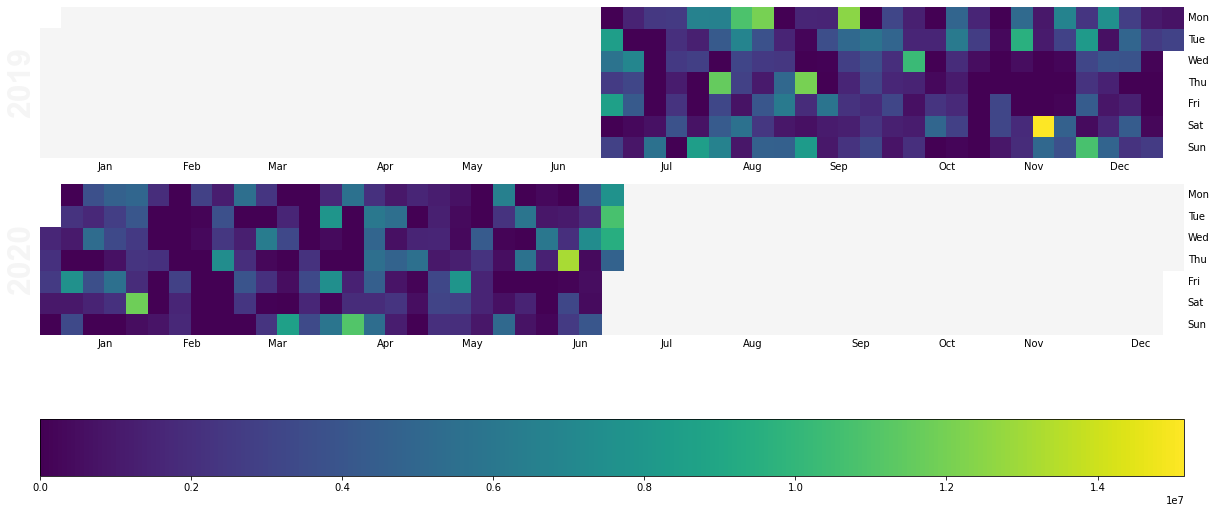

In [162]:
from matplotlib.pyplot import figure
import calmap
%matplotlib inline
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

dat= dst
dat['Date'] = dat.apply(lambda x: pd.to_datetime(x['Date'],format='%Y-%m-%d'),axis=1)
fig,ax=calmap.calendarplot(dat.groupby('Date',as_index=True).sum()['msPlayed'],
                           cmap='viridis',
                          linewidth=0,
                          fig_kws=dict(figsize=(17,8)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(),orientation='horizontal')
